In [3]:
%load_ext autoreload
%autoreload 2
from model import *
from tqdm import tqdm, trange

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
population_basic = Population(80, BasicFunction(), [-10, 10], label="basic")
population_rastrigin = Population(80, RastriginFunction(dim=5), [-10, 10], label="rastrigin")

population_basic.evolve(generations=80)
population_rastrigin.evolve(generations=80)

population_basic.summary()
population_rastrigin.summary()

100%|██████████████████████████████████████████| 80/80 [00:02<00:00, 38.58gen/s]

==================================   basic   ==================================
best value: 1.4011307135309994e-63
best vector: [-3.37045296e-32 -1.19666812e-32  7.80813488e-33]

================================   rastrigin   ================================
best value: 0.0
best vector: [-4.32889402e-09  4.98032353e-11  8.32728896e-10 -4.03628216e-10
  1.39484285e-09]



# Influence of `population_size`

### **Function** $x^2 + y^2 + 2z^2$

In [26]:
population_sizes = [10*i for i in range(1, 21)]
generations = 40
scope = [-10, 10]

pset_basic = PopulationSet()
for population_size in population_sizes:
    population = Population(population_size, BasicFunction(), scope, label=f"size = {population_size}")
    population.evolve(generations=generations, desc=f"size {population_size}", bar_stay=population_size==population_sizes[-1])
    pset_basic.add(population)

size 200: 100%|████████████████████████████████| 40/40 [00:03<00:00, 12.08gen/s]


#### **Model performance in relation to population size**

Generally, model performs better with bigger population, however, increasing the size beyond 60 brings diminishing returns.

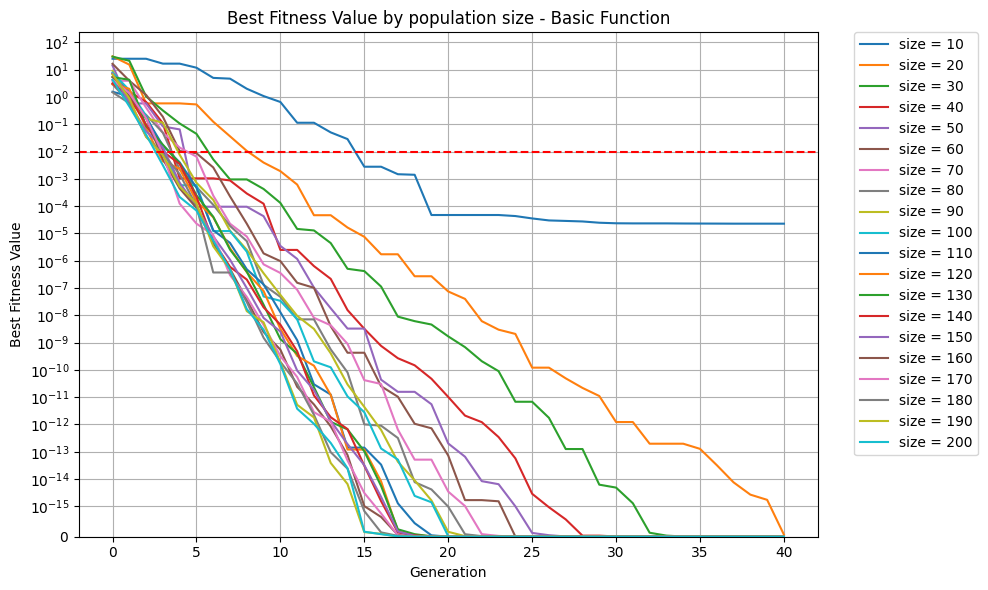

In [27]:
pset_basic.plot_best_values(title="Best Fitness Value by population size - Basic Function", log_scale=True, plot_precision=1e-15)

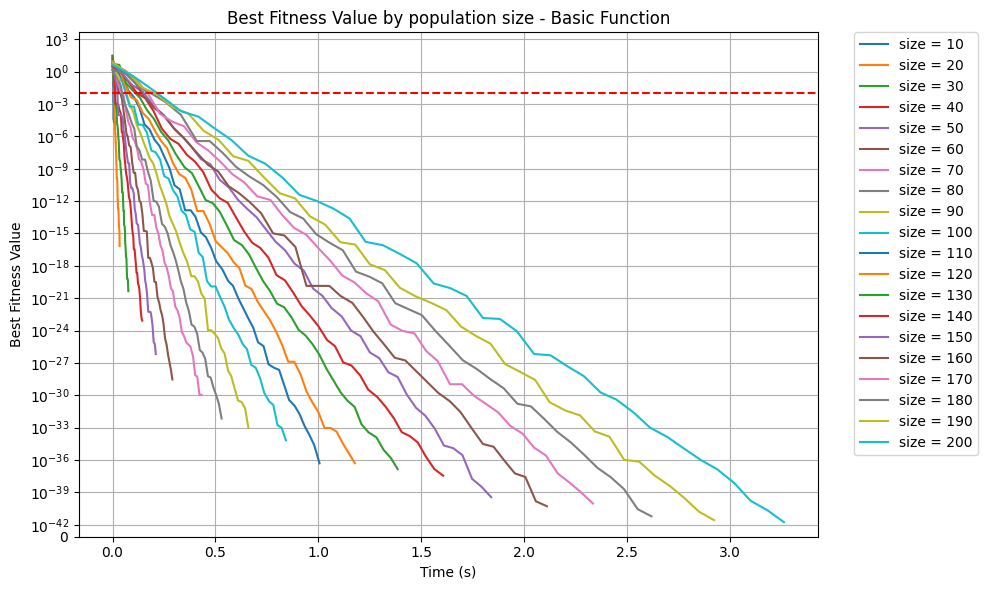

In [28]:
pset_basic.plot_best_values(title="Best Fitness Value by population size - Basic Function", log_scale=True,  x_arg="total_time")

### **Rastrigin Function** with 5 dimensions

In [35]:
population_sizes = [10*i for i in range(1, 11)]
generations = 80
scope = [-10, 10]

pset_rastrigin = PopulationSet()
for population_size in population_sizes:
    population = Population(population_size, RastriginFunction(dim=5), scope, label=f"size = {population_size}")
    population.evolve(generations=generations, desc=f"size {population_size}", bar_stay=population_size==population_sizes[-1])
    pset_rastrigin.add(population)

size 100: 100%|████████████████████████████████| 80/80 [00:03<00:00, 25.14gen/s]


#### **Model performance in relation to population size**

Model struggled to solve for Rastrigin function with smaller `population sizes` (10-30). It is a result of getting stuck in local minima.

Anything over 30 seems to work well. The correlation between increasing `population size` beyond 40 and model performence is insignificant. As the computation time increases in relation to `size`$^2$. This renders `population size` > 40 overkill

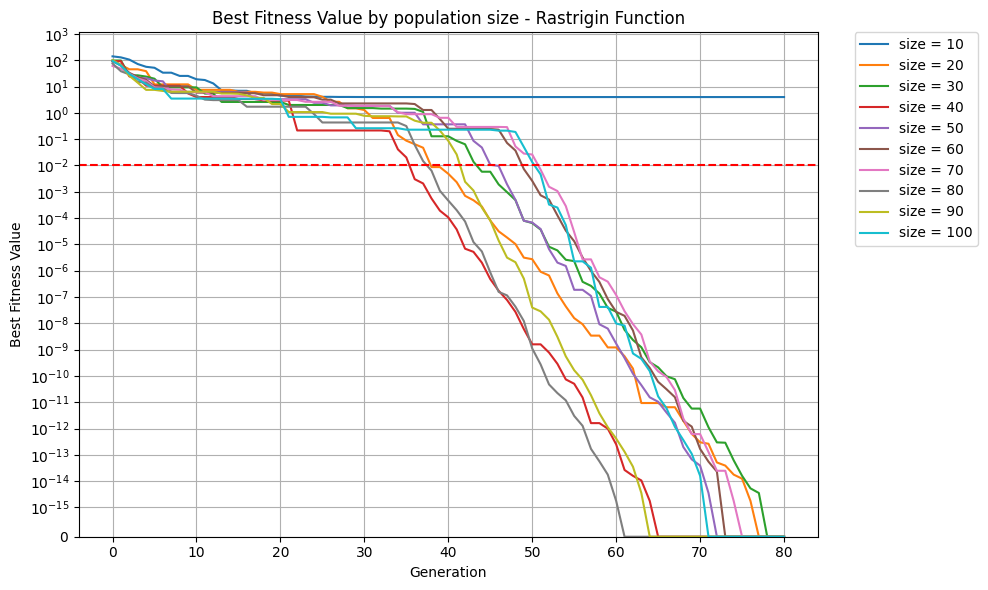

In [36]:
pset_rastrigin.plot_best_values(title="Best Fitness Value by population size - Rastrigin Function", log_scale=True, plot_precision=1e-15)

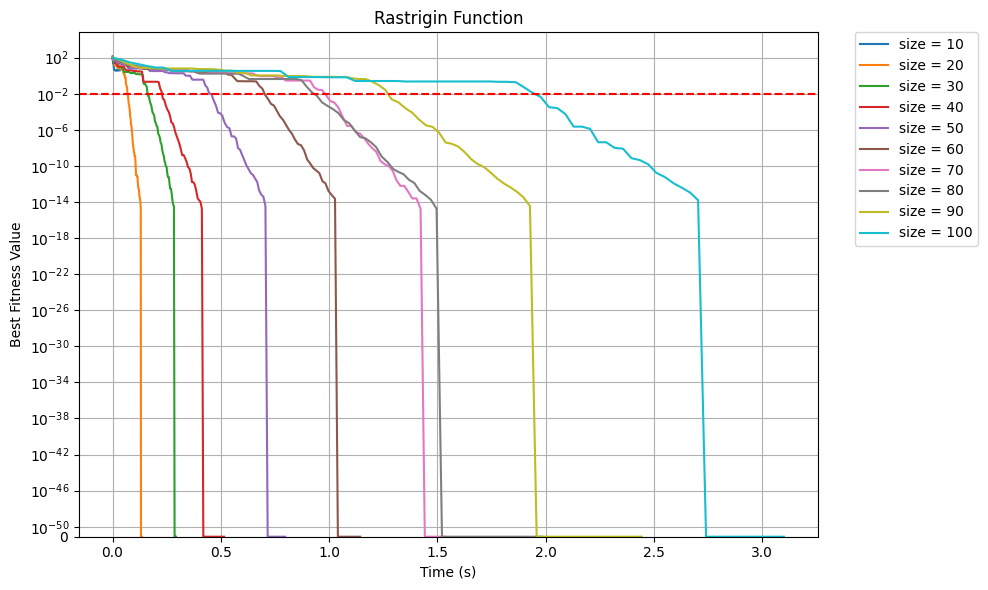

In [37]:
pset_rastrigin.plot_best_values(title="Rastrigin Function", log_scale=True, x_arg="total_time")

#### **Magic threshold**

$10^0 = 1$ seems to be the magic threshold value. Achieving this fitness function value accelerates model's progress - it is a result of rastrigin function's characteristics

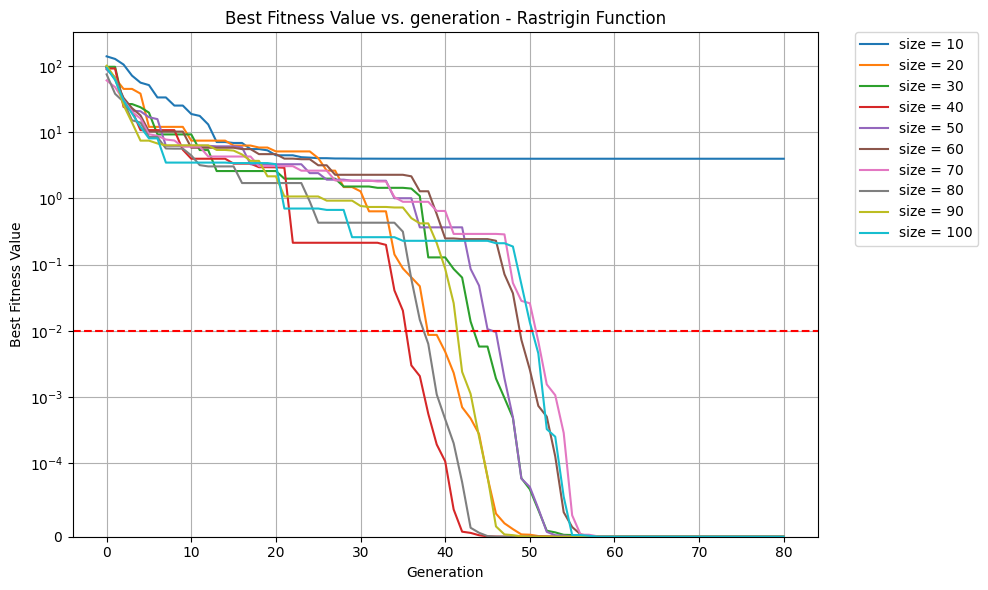

In [38]:
pset_rastrigin.plot_best_values(log_scale=True, plot_precision=1e-4)

# Influence of `parent_density` 

In [20]:
population_size = 40
generations = 200
scope = [-10, 10]
parent_densities = [i/10 for i in range(1, 11)]

pset_parentdensity = PopulationSet()
for parent_density in parent_densities:
    population = Population(population_size, BasicFunction(), scope, label=f"parent density = {parent_density}")
    population.evolve(generations=generations, desc=f"density {parent_density}", bar_stay=parent_density==1, parent_density=parent_density)
    pset_parentdensity.add(population)

density 1.0: 100%|██████████████████████████| 200/200 [00:01<00:00, 139.33gen/s]


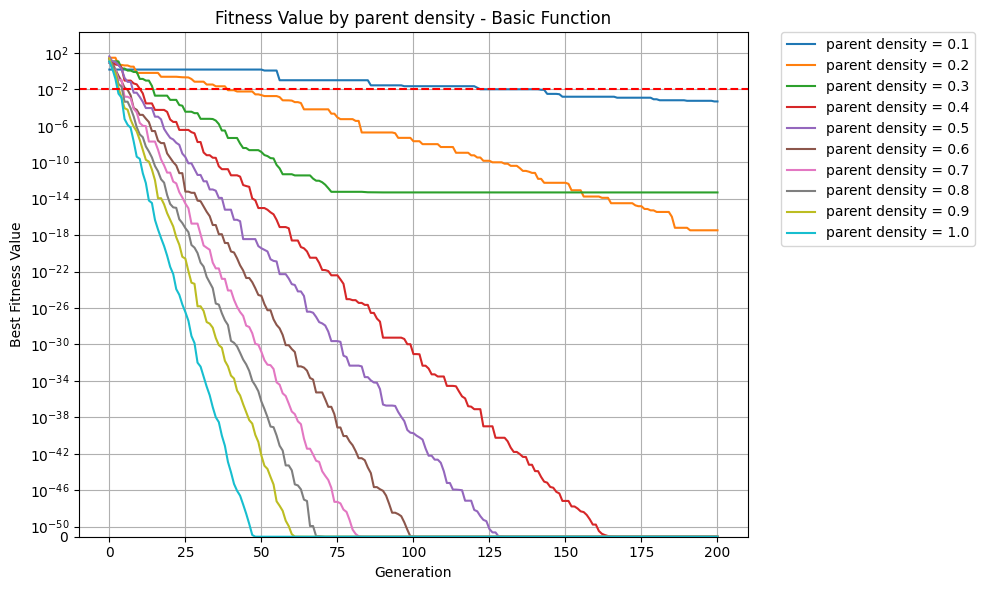

In [39]:
pset_parentdensity.plot_best_values(title="Fitness Value by parent density - Basic Function", log_scale=True)

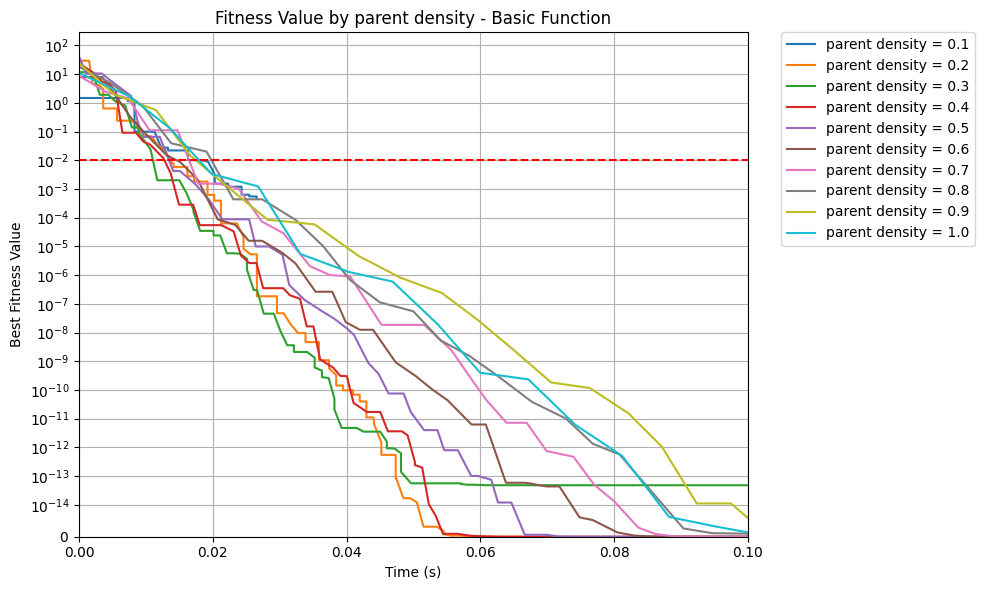

In [48]:
pset_parentdensity.plot_best_values(title="Fitness Value by parent density - Basic Function", log_scale=True, x_arg="total_time", plot_precision=1e-14, x_lim_right=0.1)

In [62]:
population_size = 40
generations = 200
scope = [-10, 10]
parent_densities = [i/10 for i in range(1, 11)]

pset_parentdensity_rastrigin = PopulationSet()
for parent_density in parent_densities:
    population = Population(population_size, RastriginFunction(dim=5), scope, label=f"parent density = {parent_density}")
    population.evolve(generations=generations, desc=f"density {parent_density}", bar_stay=parent_density==1, parent_density=parent_density)
    pset_parentdensity_rastrigin.add(population)

density 1.0: 100%|███████████████████████████| 200/200 [00:02<00:00, 75.26gen/s]


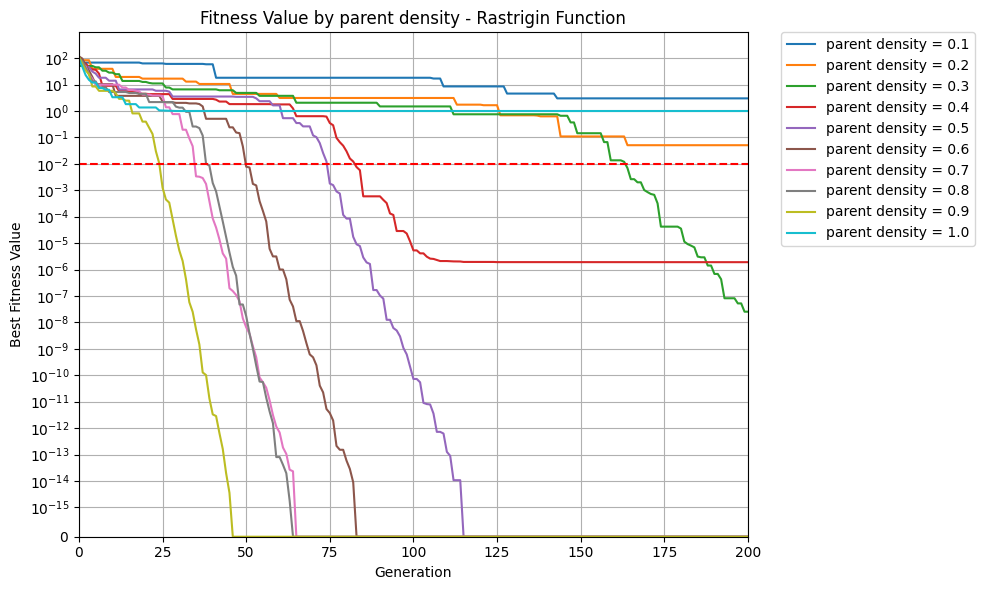

In [63]:
pset_parentdensity_rastrigin.plot_best_values(title="Fitness Value by parent density - Rastrigin Function", log_scale=True, plot_precision=1e-15)

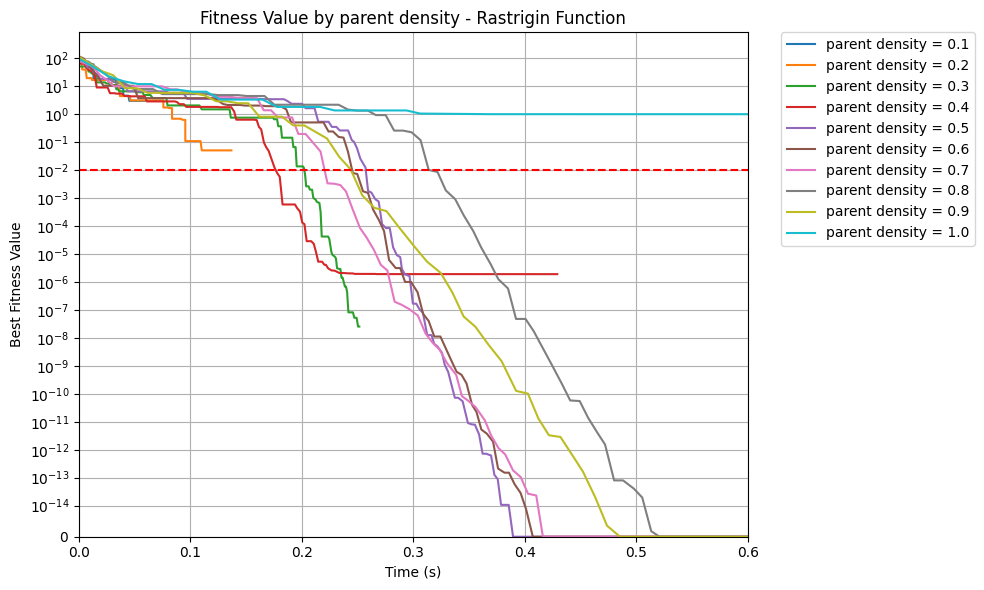

In [64]:
pset_parentdensity_rastrigin.plot_best_values(title="Fitness Value by parent density - Rastrigin Function", log_scale=True, x_arg="total_time", plot_precision=1e-14, x_lim_right=0.6)

# Influence of `mutation_scale` 

In [69]:
population_size = 40
generations = 200
scope = [-10, 10]
mutation_scales = [i/20 for i in range(1, 21)]

pset_mutationscale_basic = PopulationSet()
for mutation_scale in mutation_scales:
    population = Population(population_size, BasicFunction(), scope, label=f"mutation scale = {mutation_scale}")
    population.evolve(generations=generations, desc=f"scale {mutation_scale}", bar_stay=mutation_scale==mutation_scales[-1], mutation_scale=mutation_scale)
    pset_mutationscale_basic.add(population)

scale 1.0: 100%|████████████████████████████| 200/200 [00:00<00:00, 284.72gen/s]


### **Best mutation scales:** from 0.2 to 0.3

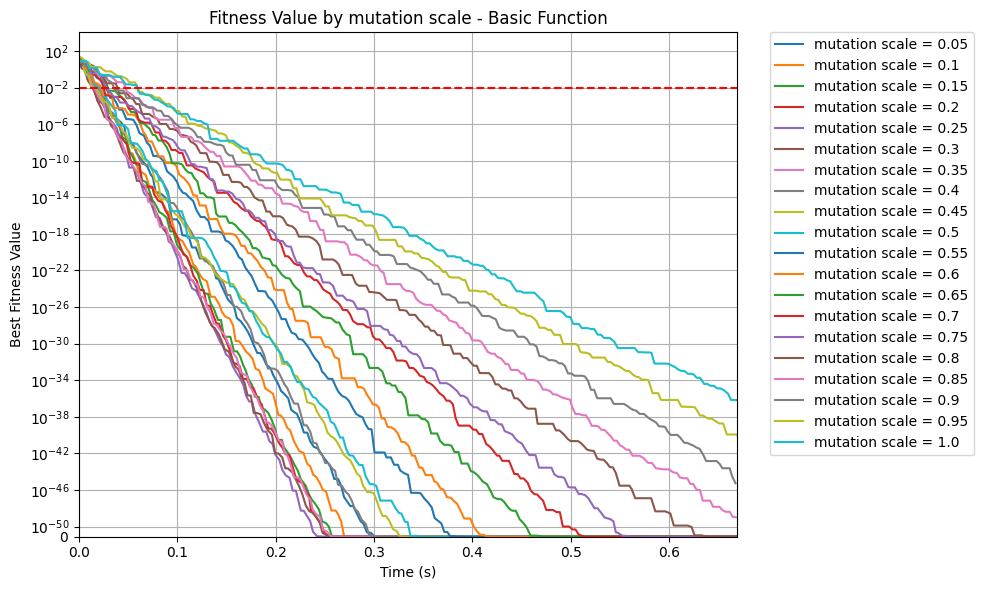

In [71]:
pset_mutationscale_basic.plot_best_values(title="Fitness Value by mutation scale - Basic Function", log_scale=True, x_arg="total_time")

# Influence of `elitism_rate` 

`elitism_rate` does not seem to have much of an incluence on model's improvement rate

In [82]:
population_size = 40
generations = 200
scope = [-10, 10]
elitism_rates = [i/20 for i in range(0, 11)]

pset_elitism_basic = PopulationSet()
for elitism_rate in elitism_rates:
    population = Population(population_size, BasicFunction(), scope, label=f"elitism rate = {elitism_rate}")
    population.evolve(generations=generations, desc=f"elitism rate {elitism_rate}", bar_stay=elitism_rate==elitism_rates[-1], elitism_rate=elitism_rate)
    pset_elitism_basic.add(population)

elitism rate 0.5: 100%|█████████████████████| 200/200 [00:00<00:00, 283.22gen/s]


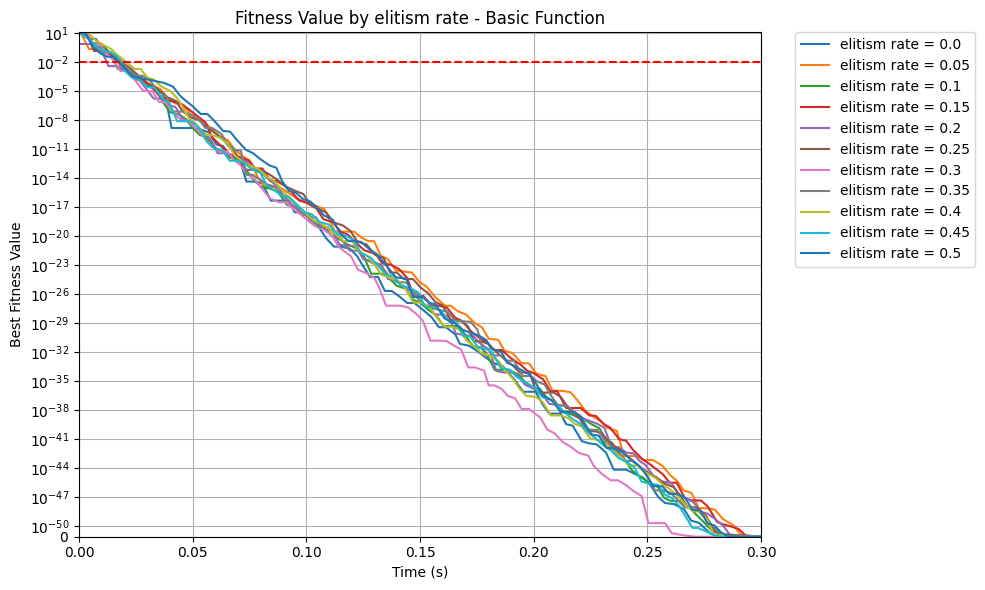

In [83]:
pset_elitism_basic.plot_best_values(title="Fitness Value by elitism rate - Basic Function", log_scale=True, x_arg="total_time", x_lim_right=0.3)

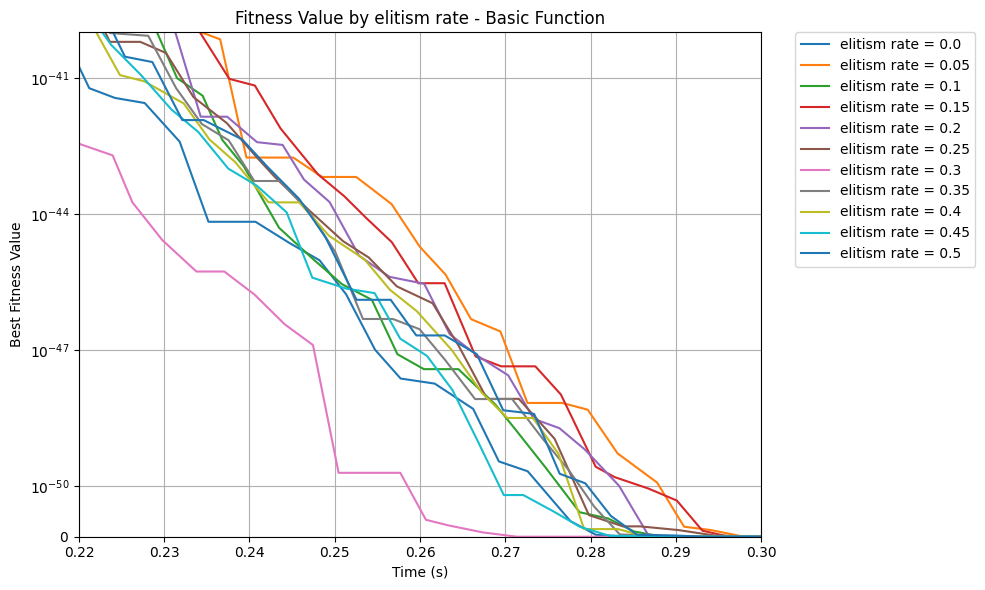

In [88]:
pset_elitism_basic.plot_best_values(title="Fitness Value by elitism rate - Basic Function", log_scale=True, x_arg="total_time", x_lim_right=0.3, x_lim_left=0.22, y_lim_top=1e-40)